In [97]:
import numpy as np
file_location = "/Users/mingchang/Desktop/smart/smart/cpp/data/h1l1/"
file_name = "h1l1_cu_3min.txt"

def handle_data(file_location, file_name):
  new_data = np.loadtxt(fname=file_location+file_name,delimiter=" ",dtype="string")
  # date is always 1st column
  date = new_data[:,0]
  # time is always 2nd column
  time = new_data[:,1]
  # returns is always last column
  returns = new_data[:,-1].astype(float)
  # features are everything in between
  features = new_data[:,2:-2].astype(float)
  # dimensions
  row_count = new_data.shape[0]
  feature_count = features.shape[1]
  # start labeling
  label=np.zeros((row_count,),dtype=int)
  for i in range(row_count):
    profit = returns[i]
    if profit > 0.0:
      label[i] = 1
    else:
      label[i] = -1
  # feature scaling
  feature_max = np.amax(features, axis=0)
  feature_min = np.amin(features, axis=0)
  feature_range = feature_max - feature_min
  for i in range(feature_count):
    if feature_range[i] == 0:
      feature_range[i] = 1
  feature_rescale = (features - feature_min)/feature_range
  labels = label.reshape(row_count,1)
  feature_rescale = feature_rescale.tolist()
  feature = features.tolist()
  labels = label.tolist()
  true_return = returns.tolist()
  return feature, feature_rescale, labels, true_return

feature, feature_rescale, labels, true_return = handle_data(file_location, file_name)

In [98]:
data = np.asarray(feature)
feature=data[:,(0,4,7,8)]
feature = feature.tolist()

In [ ]:
import random
def train_model(feature, labels, true_return):
  row_count = len(feature)
  # split between training and testing
  random_indices = random.sample(range(1,row_count),int(row_count/5))
  x = [feature[i] for i in range(1, row_count) if i not in random_indices]
  y = [labels[i] for i in range(1, row_count) if i not in random_indices]
  x_test = [feature[i] for i in random_indices]
  y_test = [labels[i] for i in random_indices]
  returns_test = [true_return[i] for i in random_indices]
  prob = svm_problem(y,x)
  # param: type = c-svc, kernal = RBF, cost = 2, gamma = 2 
  param = svm_parameter('-s 0 -t 2 -c 10000 -g 0.1 -w0 1 -w1 1 -q')
  model = svm_train(prob, param)
  # score
  p_labels, p_acc, p_vals = svm_predict(y_test, x_test, model)
  # calculate predicted return
  orig_return = sum(returns_test)
  pred_return = 0.0
  for i in range(1,len(y_test)):
    pred_return+=returns_test[i]*p_labels[i]
  print orig_return, pred_return, sum(p_labels)/len(p_labels)
  return

In [99]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5,min_samples_split=20,criterion="entropy")
clf = clf.fit(feature, labels)

In [100]:
X = feature[1]
Y = labels[1]
print X
print Y
clf.predict([X])

[114.0, 72.0, 0.585106, 5.0]
-1


array([-1])

In [101]:
clf.feature_importances_

array([ 0.23835873,  0.2844311 ,  0.21718109,  0.26002908])

In [102]:
tree.export_graphviz(clf, out_file='tree.dot')  

In [103]:
import pydot
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydot.graph_from_dot_data(dot_data) 
graph.write_pdf("tree.pdf") 

True

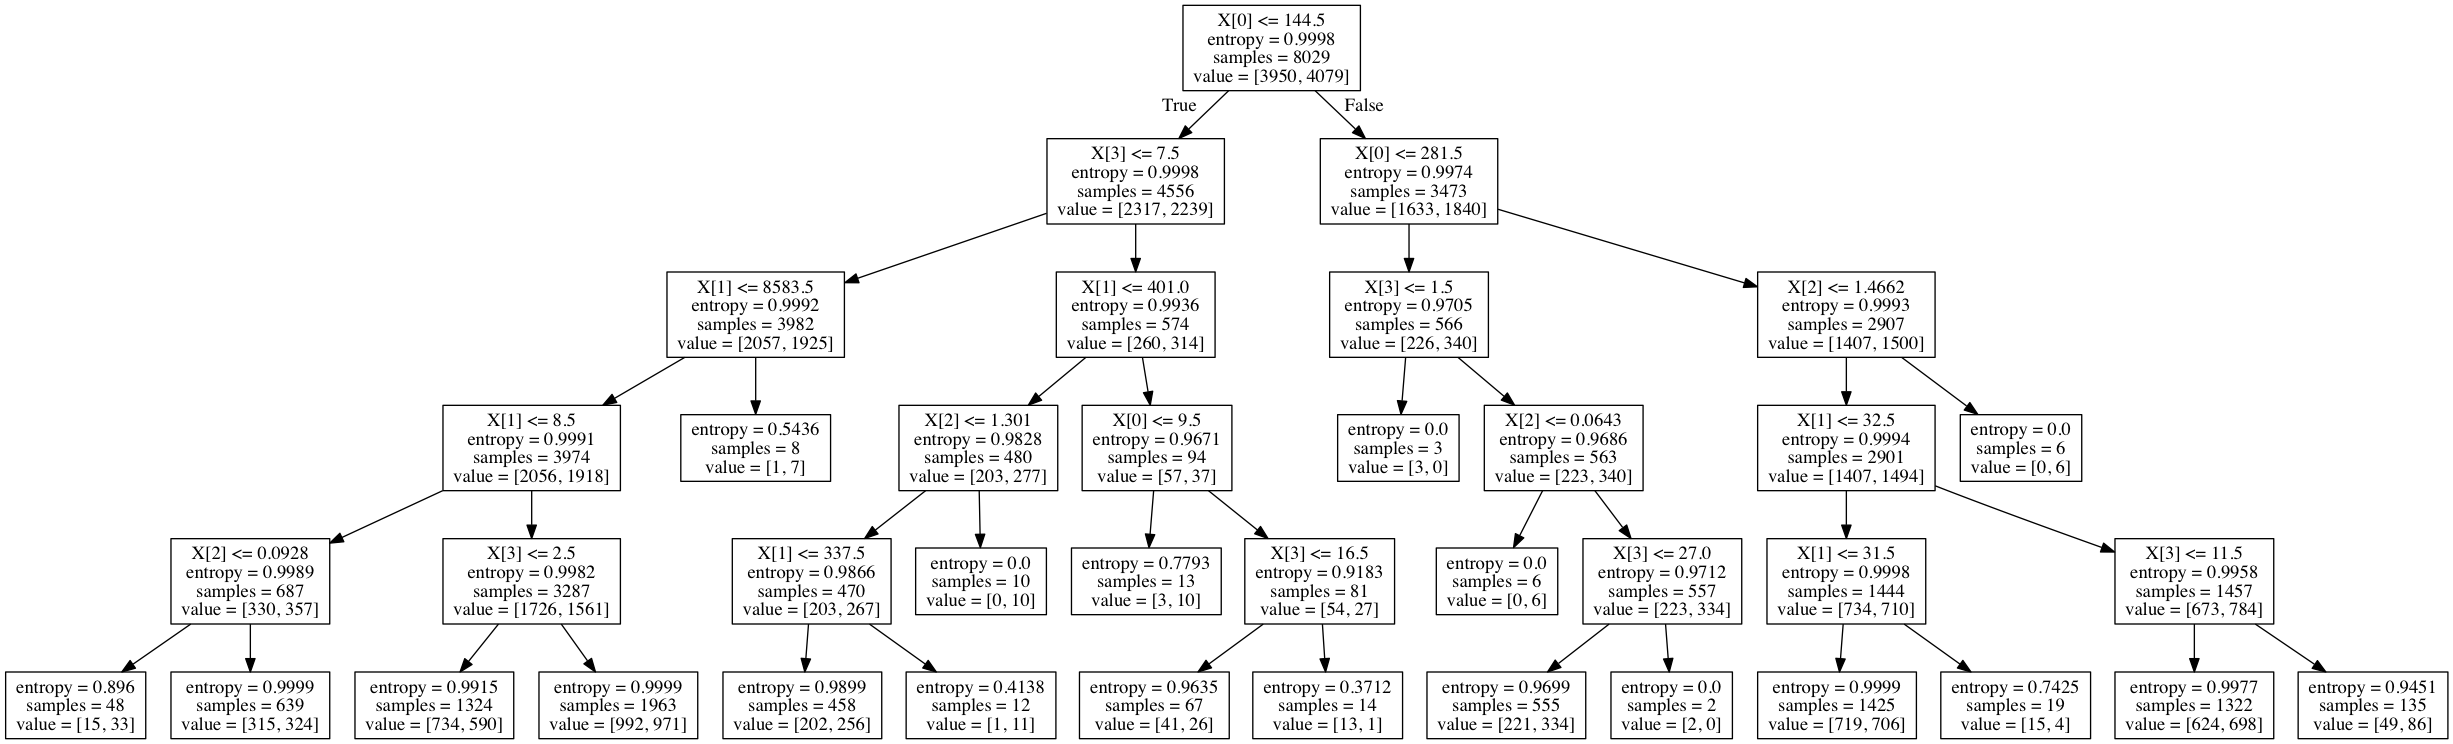

In [104]:
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None)  
graph = pydot.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [105]:
clf.classes_

array([-1,  1])

In [107]:
clf.score(feature,labels)

0.53555860007472911